#Transformación de Datos | Mineria de datos

# **Estudio de Caso: Análisis del Conjunto de Datos de Vinos**

### ***El Objetivo***  de este estudio de caso es analizar un conjunto de datos que contiene los resultados de un análisis químico de vinos cultivados en la misma región de Italia pero derivados de tres cultivares (clases) diferentes. Utilizaremos diversas técnicas de análisis y preprocesamiento de datos para:

*   Comprender la estructura y características del dataset.
*   Identificar posibles problemas en los datos (valores faltantes, outliers).

*   Preparar los datos para posibles modelos de Machine Learning (transformación, escalado).
*   Explorar la separabilidad de las clases de vino mediante técnicas de reducción de dimensionalidad (PCA y t-SNE).





# Paso 1: Análisis Exploratorio de Datos (EDA)

## 1.- Carga de Datos:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# cargamos el dataset
df = pd.read_csv('/content/wine_data.csv')

## 2.- Comprensión Inicial:

In [49]:
df.head(10)
# Ver las primeras filas.

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [50]:
# Mostrar las ultimas 5 filas del DataFrame
df.tail()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


### 📌 df.info():
> 👉 Verificar tipos de datos y valores no nulos.



In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class_label                   178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  OD280/OD315_of_diluted_wines  178 non-null    float64
 13  proli

### 📌 df.describe():

> 👉 Obtener estadísticas descriptivas para las columnas numéricas (media, std, min, max, cuartiles). Esto puede revelar rangos muy diferentes entre variables (necesidad de escalado) y posibles outliers (valores min/max extremos).




In [24]:
df.describe()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 📌 df.shape:  Ver el número de filas y columnas.

In [ ]:
df.shape

(178, 14)

In [25]:
# Revisar los nombres de las columnas para asegurar consistencia
print("\nNombres de las columnas:")
print(df.columns)


Nombres de las columnas:
Index(['class_label', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'OD280/OD315_of_diluted_wines', 'proline'],
      dtype='object')


In [26]:
# Análisis de la variable objetivo: 'class_label'
print("\nDistribución de la variable objetivo 'class_label':")
print(df['class_label'].value_counts())


Distribución de la variable objetivo 'class_label':
class_label
2    71
1    59
3    48
Name: count, dtype: int64


## 3.- Análisis de Valores Faltantes:

### df.isnull().sum(): **Contar cuántos valores faltantes hay por columna.**

In [35]:
df.isnull().sum()

,0
class_label,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0


## 4.- Análisis de Distribuciones:

**🔎 Numéricas:** Histogramas (df.hist(figsize=(12,10))) o KDE plots (sns.kdeplot) para cada variable numérica (fixed_acidity, alcohol, etc.). Esto puede mostrar asimetrías (skewness) que podrían necesitar transformación.


Histogramas de las características:


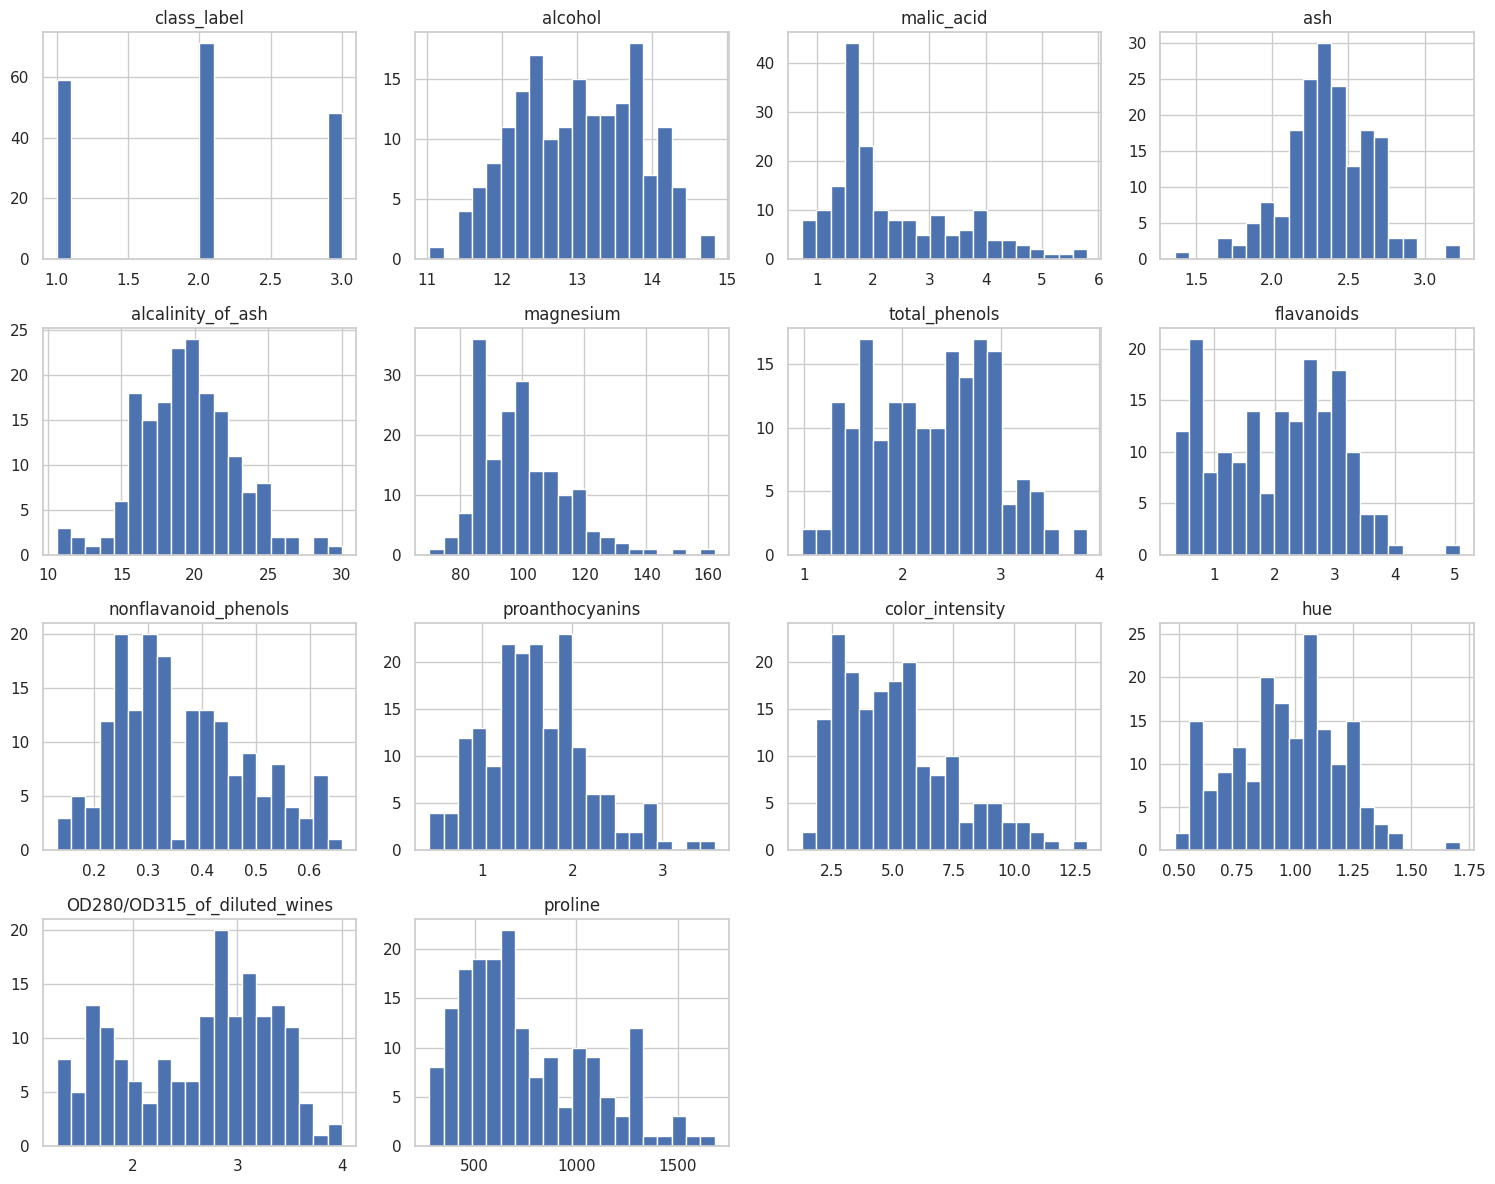

In [46]:
# Visualizar la distribución de cada característica numérica
print("\nHistogramas de las características:")
df.hist(bins=20, figsize=(15, 12), layout=(-1, 4))
plt.tight_layout() # Ajusta el layout para evitar solapamientos
plt.show()


**KDE plots (sns.kdeplot)**

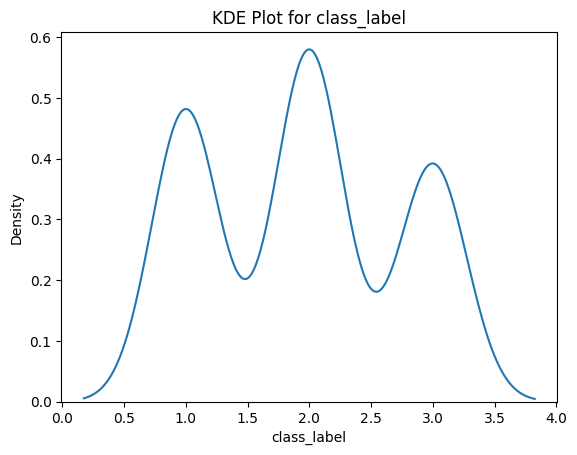

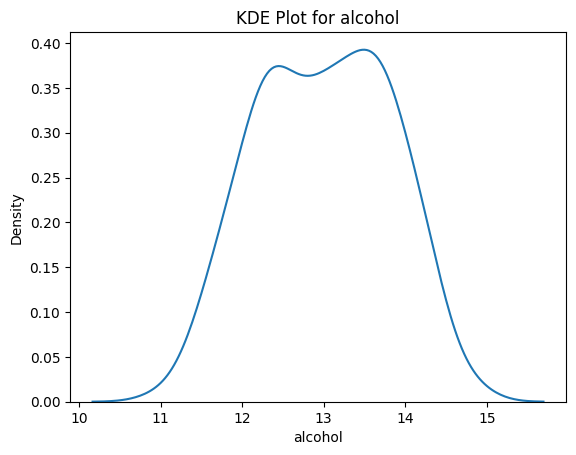

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=['number']).columns[:2]: # las 2 primeras
    sns.kdeplot(df[col])  # Crear un gráfico de KDE para cada columna
    plt.title(f'KDE Plot for {col}')  # titullo
    plt.show()  # mostrar plot

**🔎 Categóricas:** Gráficos de barras (sns.countplot)
👇

**📌 ¿Qué hace esto?**

Muestra cuántas observaciones hay por cada clase de vino `(por ejemplo, clase 0, 1, 2)`.

`class_label` es variable categórica

Es útil para ver si las clases están balanceadas o desbalanceadas.

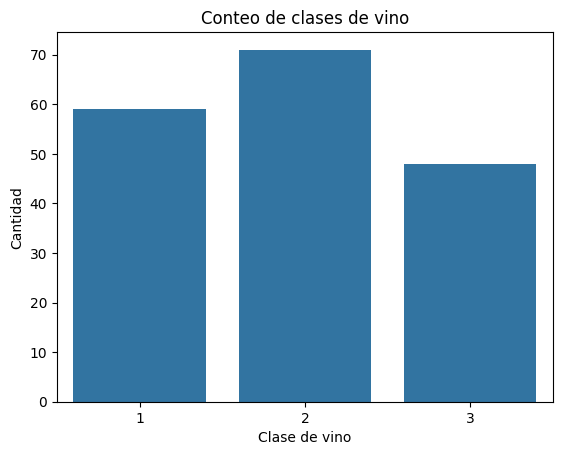

In [ ]:
sns.countplot(data=df, x='class_label')
plt.title('Conteo de clases de vino')
plt.xlabel('Clase de vino')
plt.ylabel('Cantidad')
plt.show()


 **📌¿Qué pasa aquí?**

***`pd.cut()`*** divide la columna alcohol en 4 categorías.

Luego, usamos `hue='class_label'` para ver cómo se reparten las clases dentro de cada rango de alcohol.

Esto te da una idea si cierta clase tiene más vinos con alcohol bajo o alto.

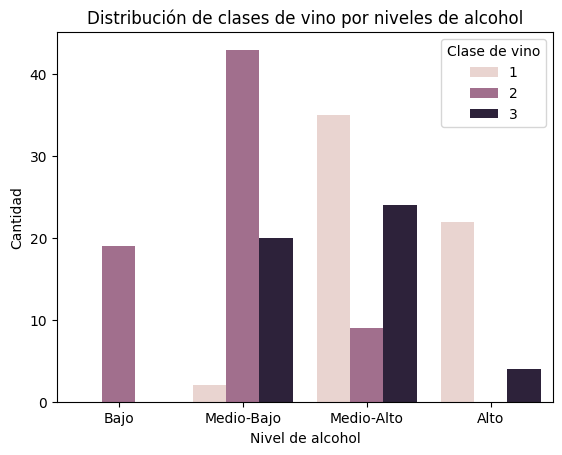

In [ ]:
# Crear categorías (bins) para 'alcohol'
df['alcohol_bins'] = pd.cut(df['alcohol'], bins=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Gráfico de barras: alcohol binned vs clase
sns.countplot(data=df, x='alcohol_bins', hue='class_label')
plt.title('Distribución de clases de vino por niveles de alcohol')
plt.xlabel('Nivel de alcohol')
plt.ylabel('Cantidad')
plt.legend(title='Clase de vino')
plt.show()


## 5.- Análisis de Correlaciones:

**🔎¿Qué verás?**

El mapa de calor muestra los valores de correlación de Pearson entre pares de variables.

Valores cercanos a 1 o -1 indican correlación fuerte (positiva o negativa).

Valores cercanos a 0 indican poca o ninguna correlación.

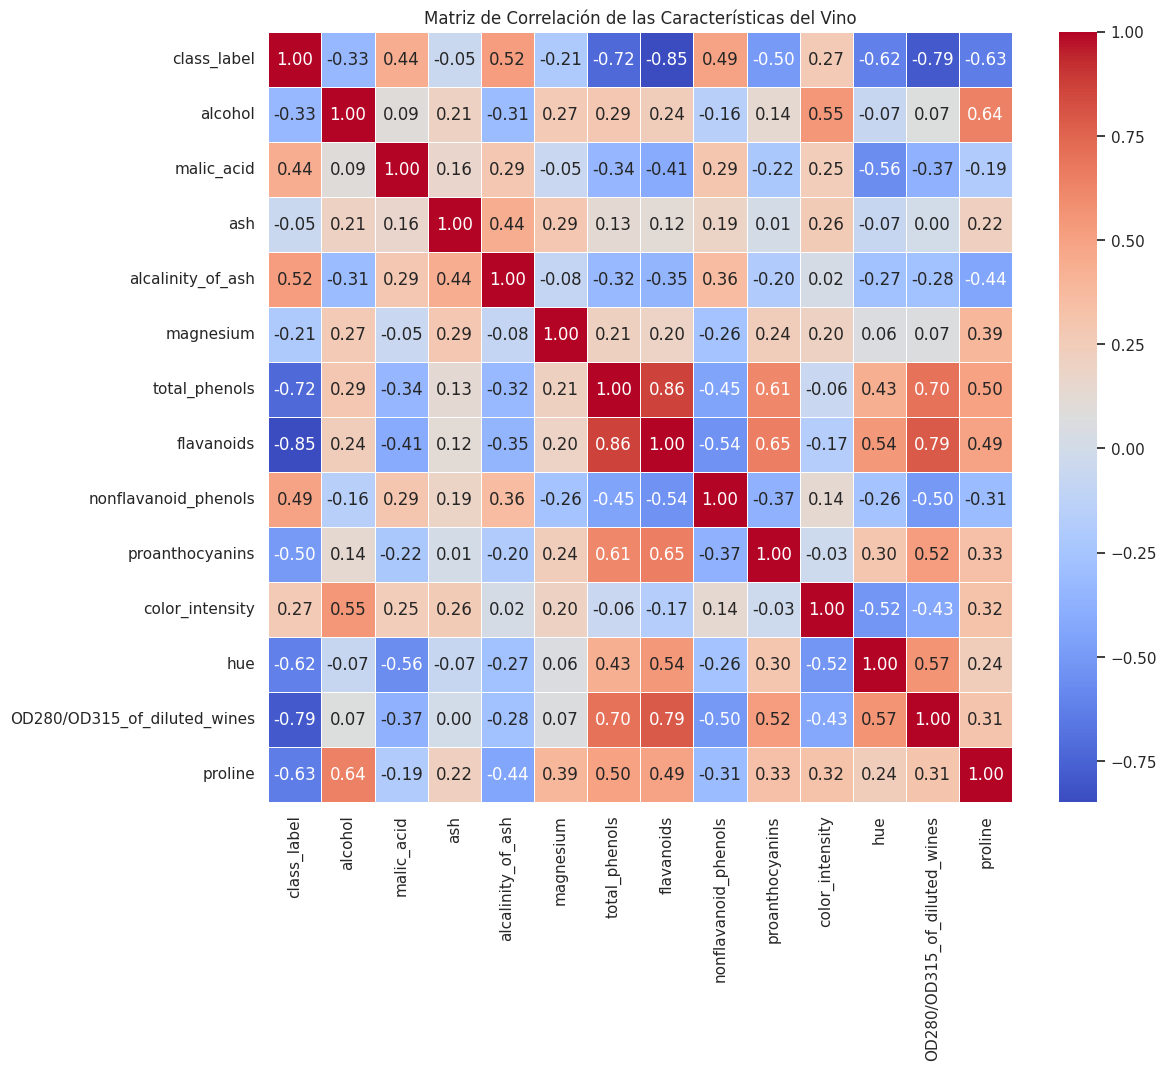

In [32]:

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de las Características del Vino')
plt.show()


In [33]:
# Analizar correlaciones con la variable objetivo (aunque 'class_label' es categórica, podemos ver tendencias)
print("\nCorrelación de características con 'class_label':")
# Calculamos la correlación excluyendo la propia variable objetivo si estuviera en la matriz
corr_with_target = correlation_matrix['class_label'].sort_values(ascending=False)
print(corr_with_target)


Correlación de características con 'class_label':
class_label                     1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
OD280/OD315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: class_label, dtype: float64


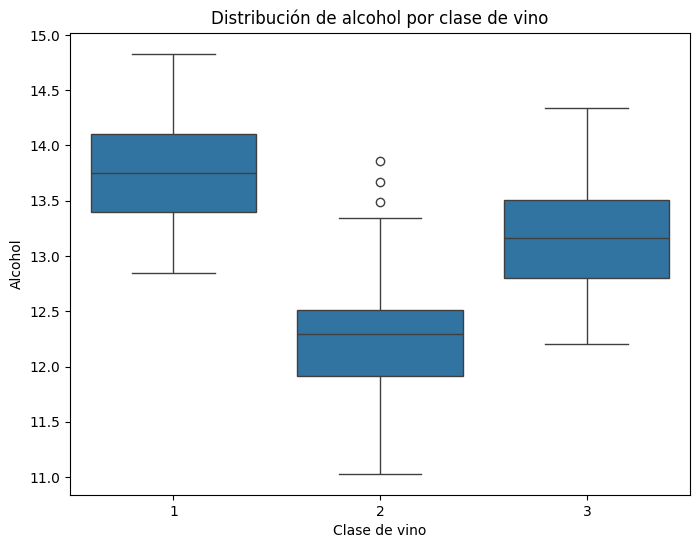

In [ ]:
# Ejemplo con alcohol vs class_label
plt.figure(figsize=(8, 6))
sns.boxplot(x='class_label', y='alcohol', data=df)
plt.title('Distribución de alcohol por clase de vino')
plt.xlabel('Clase de vino')
plt.ylabel('Alcohol')
plt.show()


# Paso 2: Limpieza de Datos

Verificamos explícitamente si hay valores faltantes y consideramos el manejo de outliers (aunque para este análisis inicial, no eliminaremos outliers a menos que sean claramente errores).

## 1.- Verificar valores faltantes (missing values)

In [12]:
print("\nConteo de valores faltantes por columna:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\nNo se encontraron valores faltantes en el dataset.")
else:
    print("\nSe encontraron valores faltantes. Se debería aplicar una estrategia de imputación o eliminación.")
    # Aquí iría el código para manejar los valores faltantes si los hubiera.
    # Ej: df.fillna(df.median(), inplace=True) o df.dropna(inplace=True)


Conteo de valores faltantes por columna:
class_label                     0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted_wines    0
proline                         0
dtype: int64

No se encontraron valores faltantes en el dataset.


✅ Confirmamos que no hay valores faltantes. El dataset está completo en ese sentido.

## 2.- Identificación básica de outliers usando Boxplots (para algunas variables clave)

Los boxplots muestran algunos puntos fuera de los `"bigotes" (whiskers)` en variables como `malic_acid, ash, alcalinity_of_ash, magnesium, proanthocyanins, color_intensity, hue.` Estos son posibles **outliers**. Para este estudio, asumiremos que son valores válidos dentro de la variabilidad natural de los vinos y no los eliminaremos, pero es algo a tener en cuenta si un modelo de Machine Learning funciona mal. El escalado que haremos más adelante ayudará a mitigar su impacto en algoritmos sensibles a la escala.

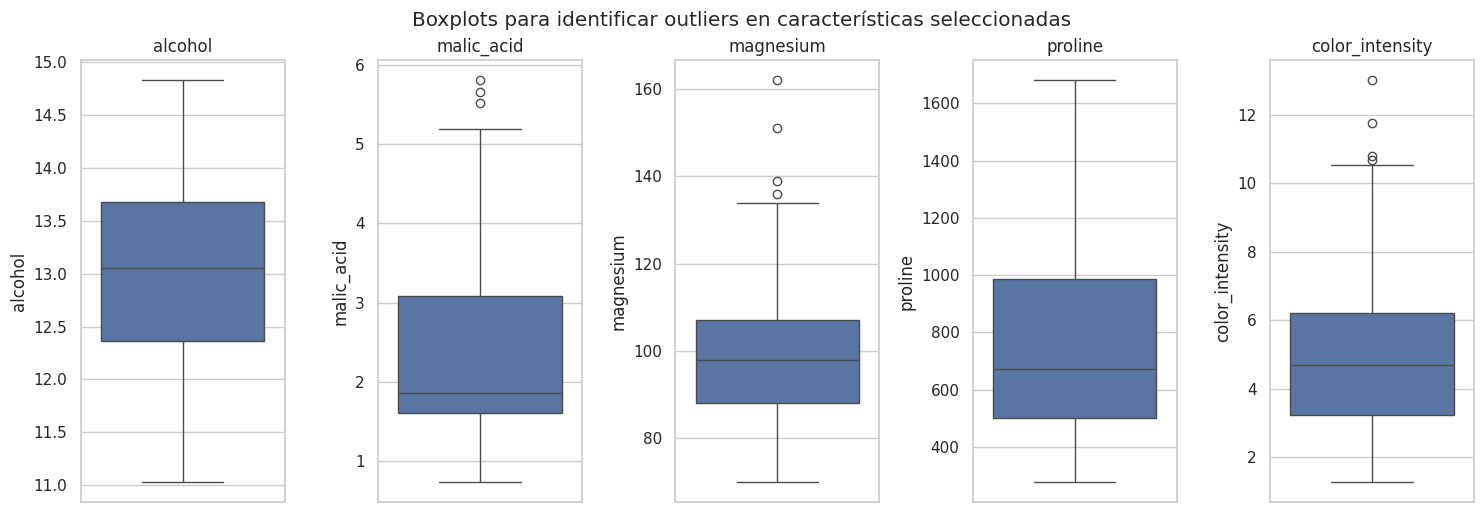

In [13]:
features_to_plot = ['alcohol', 'malic_acid', 'magnesium', 'proline', 'color_intensity']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, len(features_to_plot), i + 1)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.suptitle('Boxplots para identificar outliers en características seleccionadas', y=1.02)
plt.show()

# Paso 3: Transformación de Datos


Esta fase incluye el escalado/normalización de características y la codificación de variables categóricas (si las hubiera).

## 3.1 Separación de Características y Variable Objetivo

In [40]:
# Separar las características (X) y la variable objetivo (y)
X = df.drop('class_label', axis=1)
y = df['class_label']

# Mostrar información ordenada
print("="*50)
print("✅ Características (X) - Primeras 5 filas:\n")
print(X.head())

print("\n" + "="*50)
print("🎯 Variable Objetivo (y) - Primeras 5 filas:\n")
print(y.head())

print("\n" + "="*50)
print(f"📐 Dimensiones de X: {X.shape}")
print(f"🎯 Dimensiones de y: {y.shape}")
print("="*50)


✅ Características (X) - Primeras 5 filas:

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280/OD315_of_d

✅ Separamos las características (X) de la variable objetivo (y).

## 3.2 Escalado de Características (Normalización/Estandarización)

Dado que las características tienen escalas muy diferentes y vamos a usar PCA (que es sensible a la varianza), es fundamental escalar los datos. Usaremos StandardScaler, que estandariza las características para que tengan media 0 y desviación estándar 1.

In [42]:
from sklearn.preprocessing import StandardScaler
# Escalado de características
print("="*50)
print("🚀 Escalando las características numéricas con StandardScaler...")

# Instanciar el escalador
scaler = StandardScaler()

# Ajustar el escalador a los datos y transformarlos
X_scaled = scaler.fit_transform(X)

# Convertir el resultado a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\n✅ Características escaladas - Primeras 5 filas:\n")
print(X_scaled_df.head())

print("="*50)


🚀 Escalando las características numéricas con StandardScaler...

✅ Características escaladas - Primeras 5 filas:

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  OD280/OD315_of_diluted_win

In [18]:
print("\nResumen estadístico de las características escaladas:")
print(X_scaled_df.describe().round(2)) # Redondear para mejor legibilidad


Resumen estadístico de las características escaladas:
       alcohol  malic_acid     ash  alcalinity_of_ash  magnesium  \
count   178.00      178.00  178.00             178.00     178.00   
mean     -0.00       -0.00   -0.00              -0.00      -0.00   
std       1.00        1.00    1.00               1.00       1.00   
min      -2.43       -1.43   -3.68              -2.67      -2.09   
25%      -0.79       -0.66   -0.57              -0.69      -0.82   
50%       0.06       -0.42   -0.02               0.00      -0.12   
75%       0.84        0.67    0.70               0.60       0.51   
max       2.26        3.11    3.16               3.15       4.37   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count         178.00      178.00                178.00           178.00   
mean            0.00       -0.00                  0.00            -0.00   
std             1.00        1.00                  1.00             1.00   
min            -2.11       -1.70

✅ Las características ahora están centradas alrededor de 0 y tienen una desviación estándar cercana a 1. Esto asegura que todas las características contribuyan de manera equitativa a los análisis basados en distancia o varianza, como PCA.

## 3.3 Codificación de Variables Categóricas



> 🔎 En este dataset, todas las características predictoras son numéricas. La variable objetivo class_label es numérica pero representa categorías. Para muchos modelos, se usaría directamente, pero si tuviéramos características predictoras categóricas (e.g., 'Tipo de Uva' como texto), necesitaríamos codificarlas (usando LabelEncoder para ordinales o OneHotEncoder para nominales). Para este caso, no se requiere codificación en las características X.




# 4.- Reducción de Dimensionalidad

Reducimos el número de características para facilitar la visualización y, potencialmente, mejorar el rendimiento de algunos modelos eliminando ruido o redundancia. Utilizaremos PCA y t-SNE.

## 4.1 Análisis de Componentes Principales (PCA)

PCA busca encontrar las direcciones (componentes principales) que maximizan la varianza en los datos. Es una técnica lineal.

In [19]:
# Aplicar PCA para reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) # Usar los datos escalados!

# Crear un DataFrame con los resultados de PCA y la etiqueta de clase
pca_df = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_df['class_label'] = y # Añadir la etiqueta original para colorear

print("\nResultados de PCA (primeras 5 filas):")
print(pca_df.head())



Resultados de PCA (primeras 5 filas):
   Componente Principal 1  Componente Principal 2  class_label
0                3.316751                1.443463            1
1                2.209465               -0.333393            1
2                2.516740                1.031151            1
3                3.757066                2.756372            1
4                1.008908                0.869831            1


📊 Varianza explicada por los Componentes Principales:

🧩 Componente Principal 1: 36.20%
🧩 Componente Principal 2: 19.21%
🔢 Varianza total explicada (2 componentes): 55.41%


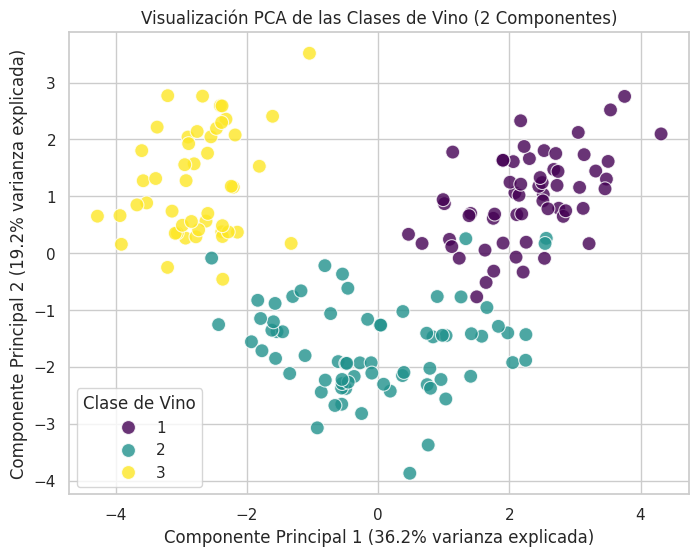

In [44]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("="*60)
print("📊 Varianza explicada por los Componentes Principales:\n")
print(f"🧩 Componente Principal 1: {explained_variance[0]:.2%}")
print(f"🧩 Componente Principal 2: {explained_variance[1]:.2%}")
print(f"🔢 Varianza total explicada (2 componentes): {explained_variance.sum():.2%}")
print("="*60)

# Visualizar los resultados de PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='class_label', data=pca_df, palette='viridis', s=100, alpha=0.8)
plt.title('Visualización PCA de las Clases de Vino (2 Componentes)')
plt.xlabel(f'Componente Principal 1 ({explained_variance[0]:.1%} varianza explicada)')
plt.ylabel(f'Componente Principal 2 ({explained_variance[1]:.1%} varianza explicada)')
plt.legend(title='Clase de Vino')
plt.grid(True)
plt.show()

✅ Los dos primeros componentes principales explican aproximadamente el 55% de la varianza total en los datos escalados (Componente 1: ~36%, Componente 2: ~19%).

La visualización en 2D muestra una buena separación entre las clases. La clase 1 (púrpura/azul oscuro) está mayormente separada a la izquierda/arriba, la clase 3 (amarillo) a la derecha/abajo, y la clase 2 (verde/turquesa) se encuentra en una posición intermedia, aunque con cierta superposición con las otras dos. Esto sugiere que las características químicas contienen información suficiente para distinguir los tipos de vino

## 4.2 t-SNE (t-Distributed Stochastic Neighbor Embedding):

🔎 t-SNE es una técnica no lineal especialmente buena para visualizar datos de alta dimensionalidad en pocas dimensiones (generalmente 2 o 3). Se enfoca en preservar la estructura local (similitud entre puntos cercanos).

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(



Resultados de t-SNE (primeras 5 filas):
   Dimensión t-SNE 1  Dimensión t-SNE 2  class_label
0           6.754516          -7.386443            1
1           5.275704          -4.990004            1
2           8.953320          -4.128287            1
3           9.049277          -6.516700            1
4           7.427025          -0.897260            1


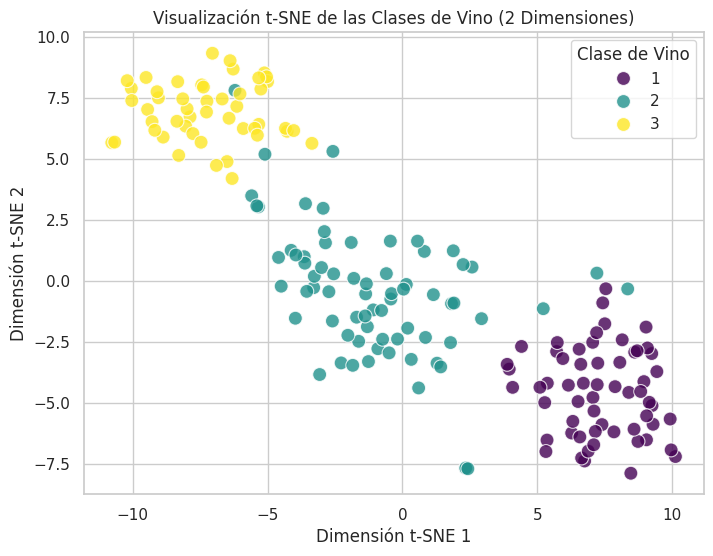

In [21]:
# Aplicar t-SNE para reducir a 2 dimensiones
# Parámetros comunes: perplexity (usualmente entre 5 y 50), n_iter (al menos 250)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled) # Usar los datos escalados!

# Crear un DataFrame con los resultados de t-SNE y la etiqueta de clase
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimensión t-SNE 1', 'Dimensión t-SNE 2'])
tsne_df['class_label'] = y # Añadir la etiqueta original para colorear

print("\nResultados de t-SNE (primeras 5 filas):")
print(tsne_df.head())

# Visualizar los resultados de t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dimensión t-SNE 1', y='Dimensión t-SNE 2', hue='class_label', data=tsne_df, palette='viridis', s=100, alpha=0.8)
plt.title('Visualización t-SNE de las Clases de Vino (2 Dimensiones)')
plt.xlabel('Dimensión t-SNE 1')
plt.ylabel('Dimensión t-SNE 2')
plt.legend(title='Clase de Vino')
plt.grid(True)
plt.show()

**Conclusiones:**

✅ Hemos explorado y preparado exitosamente el dataset de vinos. Las visualizaciones de PCA y t-SNE demuestran que las características químicas medidas contienen información suficiente para distinguir entre los tres cultivares de vino. Los datos escalados y las representaciones de baja dimensionalidad (PCA/t-SNE) están ahora listos para ser utilizados en tareas posteriores, como la construcción de modelos de clasificación (e.g., K-NN, SVM, Random Forest) para predecir la clase de un vino basándose en sus propiedades químicas.